In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import math

In [2]:
df = pd.read_csv('adultdata.txt')

In [3]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
              'capital-gain','capital-loss','hours-per-week','native-country','(target)income']

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,(target)income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='sex', ylabel='count'>

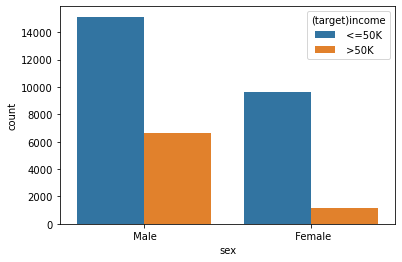

In [5]:
sns.countplot(x='sex', hue='(target)income', data=df)

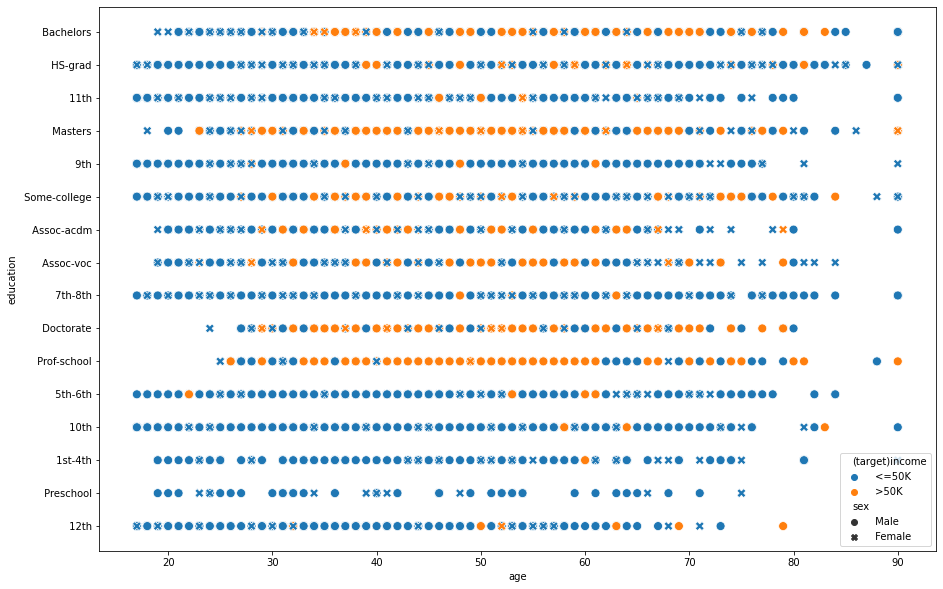

In [6]:
plt.figure(figsize=(15,10))
fig=sns.scatterplot(x='age', y='education', data=df, hue='(target)income', style='sex', s=80)


In [7]:
income= pd.get_dummies(df['(target)income'], drop_first=True)

In [8]:
income

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [9]:
df = pd.concat([df,income], axis=1)


In [10]:
df = df.drop(['(target)income'], axis=1)

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [12]:
df = df.drop(['workclass','fnlwgt','education','relationship','race','native-country'], axis=1)

In [13]:
df.head()

,age,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,>50K
0,50,13,Married-civ-spouse,Exec-managerial,Male,0,0,13,0
1,38,9,Divorced,Handlers-cleaners,Male,0,0,40,0
2,53,7,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,0
3,28,13,Married-civ-spouse,Prof-specialty,Female,0,0,40,0
4,37,14,Married-civ-spouse,Exec-managerial,Female,0,0,40,0


In [14]:
mat_stat = pd.get_dummies(df['marital-status'])
occ = pd.get_dummies(df['occupation'])
sex = pd.get_dummies(df['sex'], drop_first=True)

In [15]:
mat_stat.describe()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.136456,0.000706,0.459951,0.012838,0.328071,0.031480,0.030498
std,0.343277,0.026569,0.498401,0.112576,0.469518,0.174615,0.171955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
mat_stat = mat_stat.drop([' Married-AF-spouse',' Married-spouse-absent'], axis=1)

In [17]:
occ.describe()

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.056603,0.115756,0.000276,0.125891,0.124877,0.030528,0.042076,0.061486,0.101198,0.004576,0.127150,0.019932,0.112101,0.028501,0.049048
std,0.231086,0.319936,0.016624,0.331731,0.330585,0.172038,0.200766,0.240224,0.301595,0.067493,0.333146,0.139770,0.315495,0.166402,0.215971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
occ = occ.drop([' ?', ' Armed-Forces', ' Priv-house-serv',' Handlers-cleaners'], axis=1)

In [19]:
occ

,Adm-clerical,Craft-repair,Exec-managerial,Farming-fishing,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,1,0
32556,0,0,0,0,1,0,0,0,0,0,0
32557,1,0,0,0,0,0,0,0,0,0,0
32558,1,0,0,0,0,0,0,0,0,0,0


In [20]:
sex

,Male
0,1
1,1
2,1
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,1


In [21]:
dataset = df = pd.concat([df,mat_stat,occ,sex], axis=1)

In [22]:
dataset.isnull().sum()

age                    0
education-num          0
marital-status         0
occupation             0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
 >50K                  0
 Divorced              0
 Married-civ-spouse    0
 Never-married         0
 Separated             0
 Widowed               0
 Adm-clerical          0
 Craft-repair          0
 Exec-managerial       0
 Farming-fishing       0
 Machine-op-inspct     0
 Other-service         0
 Prof-specialty        0
 Protective-serv       0
 Sales                 0
 Tech-support          0
 Transport-moving      0
 Male                  0
dtype: int64

## Independent And Dependent Variable(Train and Test split)

In [23]:
X= dataset.drop([' >50K','marital-status','occupation','sex'], axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  32560 non-null  int64
 1   education-num        32560 non-null  int64
 2   capital-gain         32560 non-null  int64
 3   capital-loss         32560 non-null  int64
 4   hours-per-week       32560 non-null  int64
 5    Divorced            32560 non-null  uint8
 6    Married-civ-spouse  32560 non-null  uint8
 7    Never-married       32560 non-null  uint8
 8    Separated           32560 non-null  uint8
 9    Widowed             32560 non-null  uint8
 10   Adm-clerical        32560 non-null  uint8
 11   Craft-repair        32560 non-null  uint8
 12   Exec-managerial     32560 non-null  uint8
 13   Farming-fishing     32560 non-null  uint8
 14   Machine-op-inspct   32560 non-null  uint8
 15   Other-service       32560 non-null  uint8
 16   Prof-specialty      3

In [25]:
y = df.iloc[:,-1]

In [26]:

y

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name:  Male, Length: 32560, dtype: uint8

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression Model Training

In [28]:
classifier = LogisticRegression()

In [29]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters = {'penalty': ['l1', 'l2','elasticnet'], 'C': [4,5,6,7,8,9,10,20,30], 
              'max_iter': [100]}

In [45]:
class_reg = GridSearchCV(classifier, param_grid=parameters,scoring='accuracy', cv=5)

In [46]:
##This took forever to get trained
class_reg.fit(X_train,y_train)

C:\Users\SHAHEEN\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHAHEEN\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [4, 5, 6, 7, 8, 9, 10, 20, 30], 'max_iter': [100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [47]:
print(class_reg.best_params_)


{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [48]:
print(class_reg.best_score_)

0.9947993447993448


In [49]:
y_pred = class_reg.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
score = accuracy_score(y_pred,y_test)
print(score)

0.9952088452088452


In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2697
           1       1.00      0.99      1.00      5443

    accuracy                           1.00      8140
   macro avg       0.99      1.00      0.99      8140
weighted avg       1.00      1.00      1.00      8140



C:\Users\SHAHEEN\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

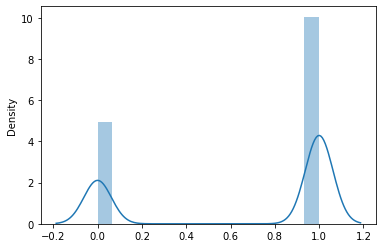

In [56]:
sns.distplot(x

In [57]:
df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,>50K,Divorced,Married-civ-spouse,Never-married,Separated,...,Exec-managerial,Farming-fishing,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Male
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234039,0.129975,0.315684,-0.534377,0.010210,...,0.099353,0.034210,-0.016257,-0.089346,0.054171,0.003891,-0.031980,-0.019576,0.026910,0.088832
education-num,0.036527,1.000000,0.122627,0.079932,0.148127,0.335182,-0.007757,0.086113,-0.032161,-0.055147,...,0.200941,-0.101529,-0.158497,-0.169676,0.419028,0.005782,0.030266,0.060710,-0.115954,0.012256
capital-gain,0.077674,0.122627,1.000000,-0.031614,0.078409,0.223333,-0.018796,0.085878,-0.066343,-0.013232,...,0.060620,-0.011723,-0.025956,-0.040269,0.085224,-0.007135,0.011653,-0.009371,-0.018060,0.048477
capital-loss,0.057775,0.079932,-0.031614,1.000000,0.054256,0.150523,-0.022399,0.080461,-0.060616,-0.013063,...,0.048308,-0.010671,-0.016261,-0.040849,0.046253,-0.003175,0.009694,0.004828,-0.003283,0.045572
hours-per-week,0.068756,0.148127,0.078409,0.054256,1.000000,0.229690,0.026052,0.212818,-0.197941,-0.016587,...,0.139208,0.094170,0.006598,-0.155873,0.060253,0.028102,0.009889,-0.013946,0.077596,0.229312
>50K,0.234039,0.335182,0.223333,0.150523,0.229690,1.000000,-0.127003,0.444688,-0.318427,-0.074390,...,0.214856,-0.051928,-0.069405,-0.156355,0.185861,0.028116,0.023682,0.025693,-0.021480,0.215995
Divorced,0.129975,-0.007757,-0.018796,-0.022399,0.026052,-0.127003,1.000000,-0.366854,-0.277764,-0.071667,...,0.013308,-0.037256,0.001421,0.015242,-0.006963,-0.006120,-0.018168,0.007188,-0.015295,-0.228615
Married-civ-spouse,0.315684,0.086113,0.085878,0.080461,0.212818,0.444688,-0.366854,1.000000,-0.644854,-0.166381,...,0.106969,0.042199,0.018003,-0.161937,0.041028,0.037252,-0.003090,-0.008456,0.074032,0.431834
Never-married,-0.534377,-0.032161,-0.066343,-0.060616,-0.197941,-0.318427,-0.277764,-0.644854,1.000000,-0.125976,...,-0.105852,-0.014108,-0.023364,0.121463,-0.024390,-0.026639,0.025200,0.010437,-0.055710,-0.171472
Separated,0.010210,-0.055147,-0.013232,-0.013063,-0.016587,-0.074390,-0.071667,-0.166381,-0.125976,1.000000,...,-0.018090,-0.013589,0.015359,0.050315,-0.016541,-0.005576,-0.012211,-0.001283,-0.010811,-0.109132
